<Figure size 1000x600 with 0 Axes>

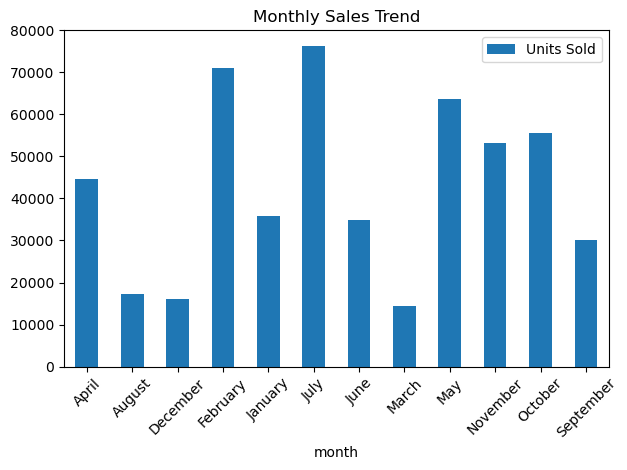

<Figure size 1000x600 with 0 Axes>

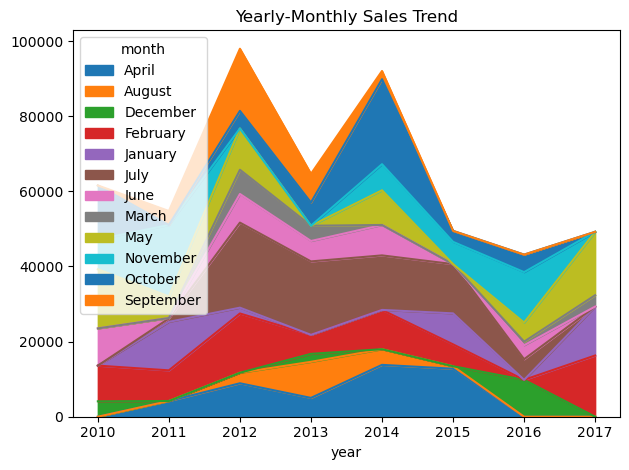

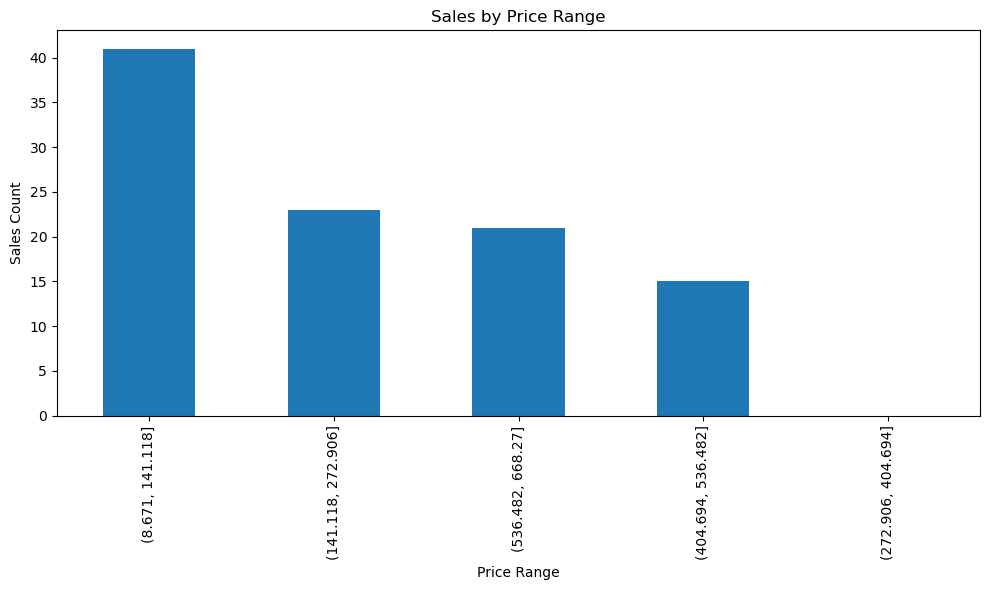

Correlation Matrix:
            Units Sold  Unit Price
Units Sold    1.000000   -0.080583
Unit Price   -0.080583    1.000000
        month  Units Sold
0       April       44680
1      August       17251
2    December       16043
3    February       71079
4     January       35742
5        July       76201
6        June       34893
7       March       14497
8         May       63651
9    November       53261
10    October       55472
11  September       30101
   year  Units Sold
0  2010       61571
1  2011       54768
2  2012       97967
3  2013       64663
4  2014       92040
5  2015       49480
6  2016       43156
7  2017       49226


<Axes: xlabel='year'>

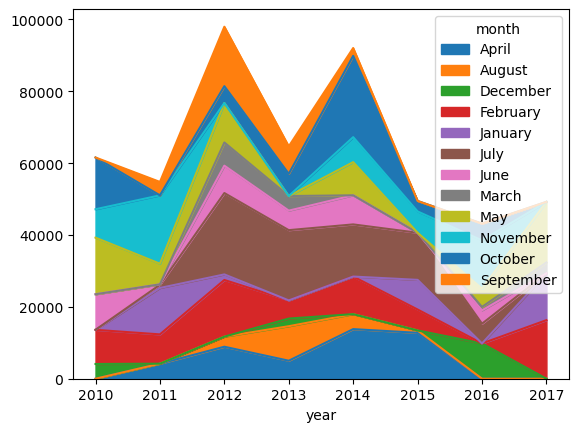

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the path to your CSV file
data_path = r"C:\Users\HP\Downloads\Amazon Sales data.csv"

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(data_path)

# Data Cleaning and Transformation (Replace with your specific logic)
#  - Handle missing values
#  - Format date columns
#  - Create new features like month, year, year-month

# Feature Engineering (Examples)
df["month"] = pd.to_datetime(df["Order Date"]).dt.month_name()
df["year"] = pd.to_datetime(df["Order Date"]).dt.year
# Check for missing values
missing_values_count = df["Order Date"].isnull().sum()
if missing_values_count > 0:
  print(f"There are {missing_values_count} rows with missing values in 'Order Date'.")
  # Remove rows with missing values (using dropna)
  df = df.dropna(subset=["Order Date"])
  print(f"Dataframe after removing rows with missing 'Order Date': {df.shape}")

# Assuming missing values are handled, convert to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")  # Adjust format if needed

# ... (Rest of your code)

df["is_weekend"] = df["Order Date"].dt.dayofweek.isin([6, 0])  # 6 for Saturday, 0 for Sunday


# Sales Trend Analysis (Examples)
monthly_sales = df.groupby("month")["Units Sold"].sum().reset_index()
yearly_sales = df.groupby("year")["Units Sold"].sum().reset_index()
yearly_monthly_sales = df.groupby(["year", "month"])["Units Sold"].sum().unstack()

# Sales vs. Other Metrics Analysis (Examples)
sales_by_category = df.groupby("Item Type")["Units Sold"].sum().reset_index()
sales_by_price_range = pd.cut(df["Unit Price"], bins=5).value_counts()

# Further analysis based on your data and needs
# Correlation Analysis (Explore other metrics based on your data)
correlation = df[["Units Sold", "Unit Price"]].corr(method="spearman")  # Spearman for non-normal data

# Visualization (Examples)
plt.figure(figsize=(10, 6))
monthly_sales.plot(x="month", y="Units Sold", kind="bar", title="Monthly Sales Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
yearly_monthly_sales.plot(kind="area", title="Yearly-Monthly Sales Trend")
plt.xticks(rotation=0)  # Ensure all x-axis labels are visible
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sales_by_price_range.plot(kind="bar", title="Sales by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Sales Count")
plt.tight_layout()
plt.show()

# Print correlation matrix for sales and price (adjust based on your analysis)
print("Correlation Matrix:")
print(correlation)
# Print or visualize the results (using libraries like matplotlib)
print(monthly_sales)
print(yearly_sales)
yearly_monthly_sales.plot(kind="area")  # Example plot using matplotlib

# ... (Analysis of other relationships)
